In [1]:
# Displays SSPP output from Young Sun 

# Created 2022 Nov. 21 by E.S.

In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
stem = "/Users/bandari/Documents/git.repos/rrlfe/"

In [3]:
# read in our values
df_retrieved = pd.read_csv(stem + "rrlfe_io_20220914_catalina/bin/retrieved_vals_20220914_catalina.csv")

In [4]:
# SSPP values (from YSL)
df_sspp = pd.read_csv(stem + "notebooks_for_development/data/NEWEST_SDSS_RRLYRAE_ECKHARD/ssppOut-RRLyae.param.csv", usecols=[1,8,65,67,173,175], 
                 names=["coadded_spec_name","TEFF_ADOP","FEH_ADOP","FEH_ADOP_UNC","FEH_SPEC","FEH_SPEC_UNC"])

In [5]:
# make column for merging
df_sspp["name_match"] = df_sspp["coadded_spec_name"]
df_sspp["name_match"] = df_sspp["name_match"].str.strip()

In [6]:
df_retrieved["junk3"] = df_retrieved["orig_spec_file_name"].str.split(pat="g", expand=True)[0].str.split(pat="spec-", expand=True)[1]
df_retrieved["junk0"] = df_retrieved["orig_spec_file_name"].str.split(pat="-", expand=True)[0]
df_retrieved["junk1"] = df_retrieved["orig_spec_file_name"].str.split(pat="-", expand=True)[1]
df_retrieved["junk2"] = df_retrieved["orig_spec_file_name"].str.split(pat="-", expand=True)[2]
df_retrieved["junk3"] = df_retrieved["junk3"].str.split(pat="-", expand=True)[2].str[1:]

In [7]:
# make name_match col
df_retrieved["name_match"] = df_retrieved["junk1"]+"-"+df_retrieved["junk2"]+"-"+df_retrieved["junk3"]

In [8]:
df_merged = df_retrieved.merge(df_sspp, on="name_match", how="outer", indicator=True)

In [9]:
# remove crazy points
idx_sane = (np.isfinite(df_merged["FEH_ADOP"]) & np.isfinite(df_merged["feh_retrieved"])) & \
                ((np.abs(df_merged["feh_retrieved"]) < 5.) & (np.abs(df_merged["FEH_ADOP"]) < 5.))

In [10]:
# best-fit coeffs
coeffs = np.polyfit(df_merged["FEH_ADOP"][idx_sane], df_merged["feh_retrieved"][idx_sane], deg=1)

In [12]:
print("coeffs", coeffs)

coeffs [ 0.56363241 -0.79766557]


Wrote junk.pdf


<Figure size 432x288 with 0 Axes>

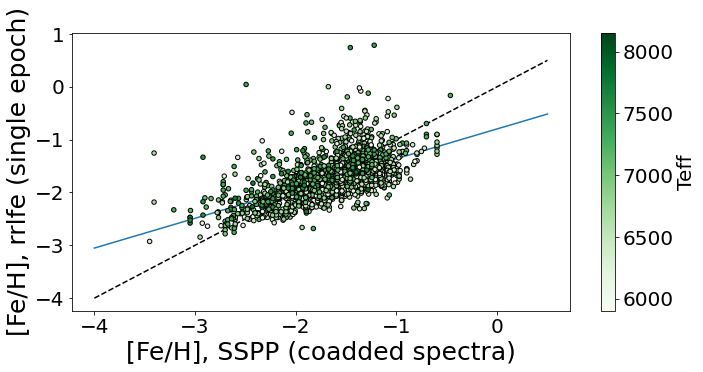

In [11]:
plt.clf()
plt.figure(figsize=(10,5))
plt.plot([-4.0,0.5],[-4.0,0.5], linestyle="--", color="black", zorder=0) # one-to-one

# if we want to compare Feh
plt.scatter(df_merged["FEH_ADOP"][idx_sane], df_merged["feh_retrieved"][idx_sane],
            c=df_merged["TEFF_ADOP"][idx_sane], cmap="Greens", s=20, alpha=1.0, label="Teff", edgecolors="k")

plt.plot([-4.0,0.5],[coeffs[0]*(-4.0)+coeffs[1],coeffs[0]*(0.5)+coeffs[1]], linestyle="-", label="best-fit, RRabs and cs", zorder=0) # line of best fit, both types

'''
# if we want to compare retrieved Teffs
plt.scatter(df_merged_1["teff"], df_merged_1["teff_retrieved"],
            c=df_merged_1["s_to_n"], cmap="Greens", s=50, edgecolors="k")
'''
plt.xlabel("[Fe/H], SSPP (coadded spectra)", fontsize=25)
plt.ylabel("[Fe/H], rrlfe (single epoch)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim(-4.,0.5)
#plt.ylim(-4.,0.5)
cbar = plt.colorbar()
cbar.set_label("Teff",fontsize=20)
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()
file_name_write_feh = "junk.pdf"
plt.savefig(file_name_write_feh)
print("Wrote",file_name_write_feh)